## Variation in hypertension drug use
Of the 600 most used drugs, 46 are for hypertension.  Hypertension, along with hyperlipidemia, is a main risk factor for heart disease, which is the top killer in the USA. The drugs are all for chronic care, and generally preventive care. 

Questions:
- Can we identify counties that adhere to evidence-based drug use?  What are the characteristics of those counties?
- Which counties use the most expensive drugs? 

There are a variety of treatment pathways for hypertension (clear from the number of drugs).  I researched a bit of what would have been known at the start of our study period: [2002 anti-hypertensives study in JAMA](http://jamanetwork.com/journals/jama/fullarticle/195626), [2003 Joint National Committee on Treatment of High Blood Pressure guidelines](http://hyper.ahajournals.org/content/hypertensionaha/43/1/1.full.pdf), [review of recent trends in drug use](http://hyper.ahajournals.org/content/48/5/846.full)

The main drugs classes are:

- Diuretics: the current recommended first-line. These include a number of types and are mostly off-patent and cheaper than the other drugs.
- Beta-blockers: older, like diuretics.  Less recommended as a first-line therapy now but still common.  Also used for other purposes besides hypertension.
- Calcium channel blockers: also a recommended first line.
- Angiotensin 2 receptor blockers: less recommended, less effective. But possibly .

To analyze variation in these drugs, I did another SVD on just the hypertension drugs. Again, I analyze how the dimension associates with known characteristics of the counties and the drugs:

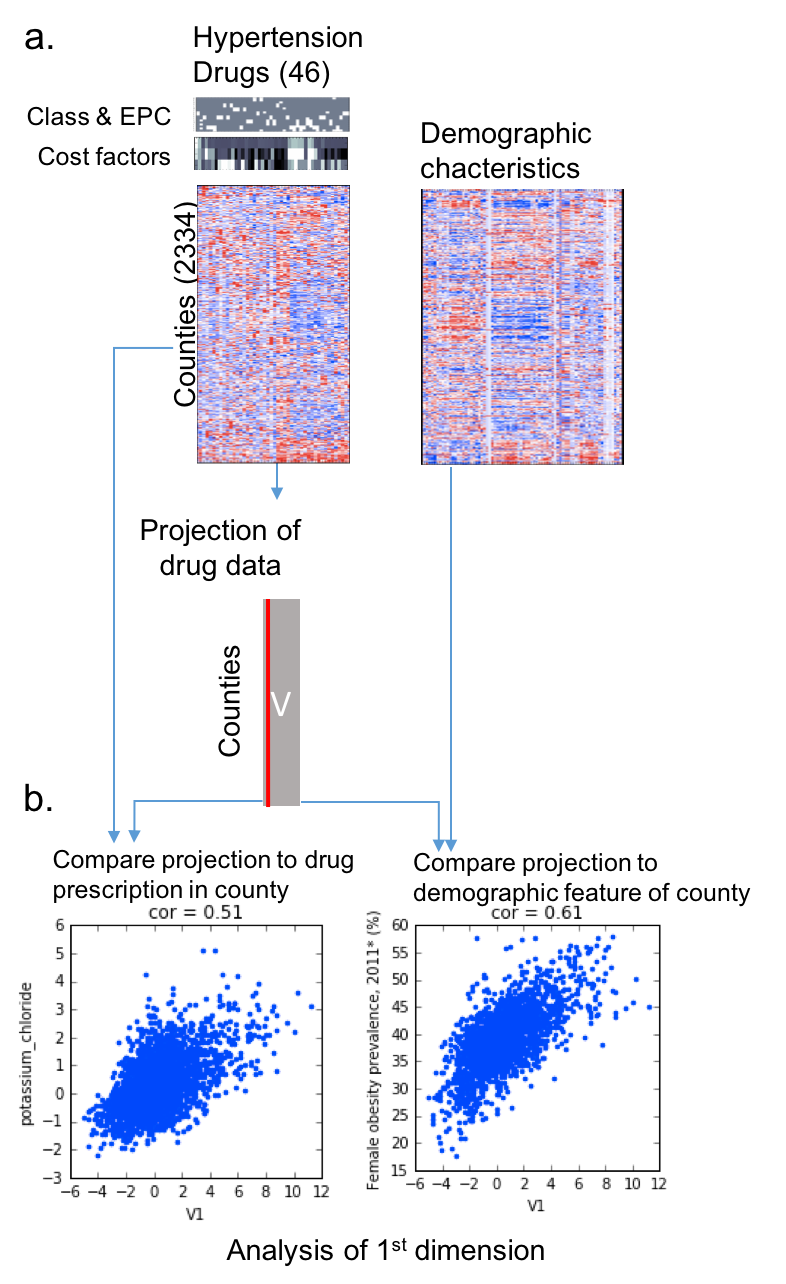

In [17]:
# Figure 1
from IPython.display import Image 
Image(filename='png/fig_dimension_correlations.png',width=500)

I find the top dimension just replicates what we know about some areas in the USA (south-eastern particularly) having higher levels of obesity and heart disease. Below, (Figure 2a) shows the counties with the highest projected values for the first dimension (which I named "V1"), representing high use of hypertension drugs.  Then, (Figure 2b) shows the correlated county demographic characteristic (left, ie, Obesity Prevalence, as in Figure 1b is .61) and the drug characteristics (Right). Note that no hypertension drug characteristics are anticorrelated with V1. The demographic characteriestics anticorrelated generally represent good health indicators.  Overall, the first dimension makes a lot of sense but is not interesting.

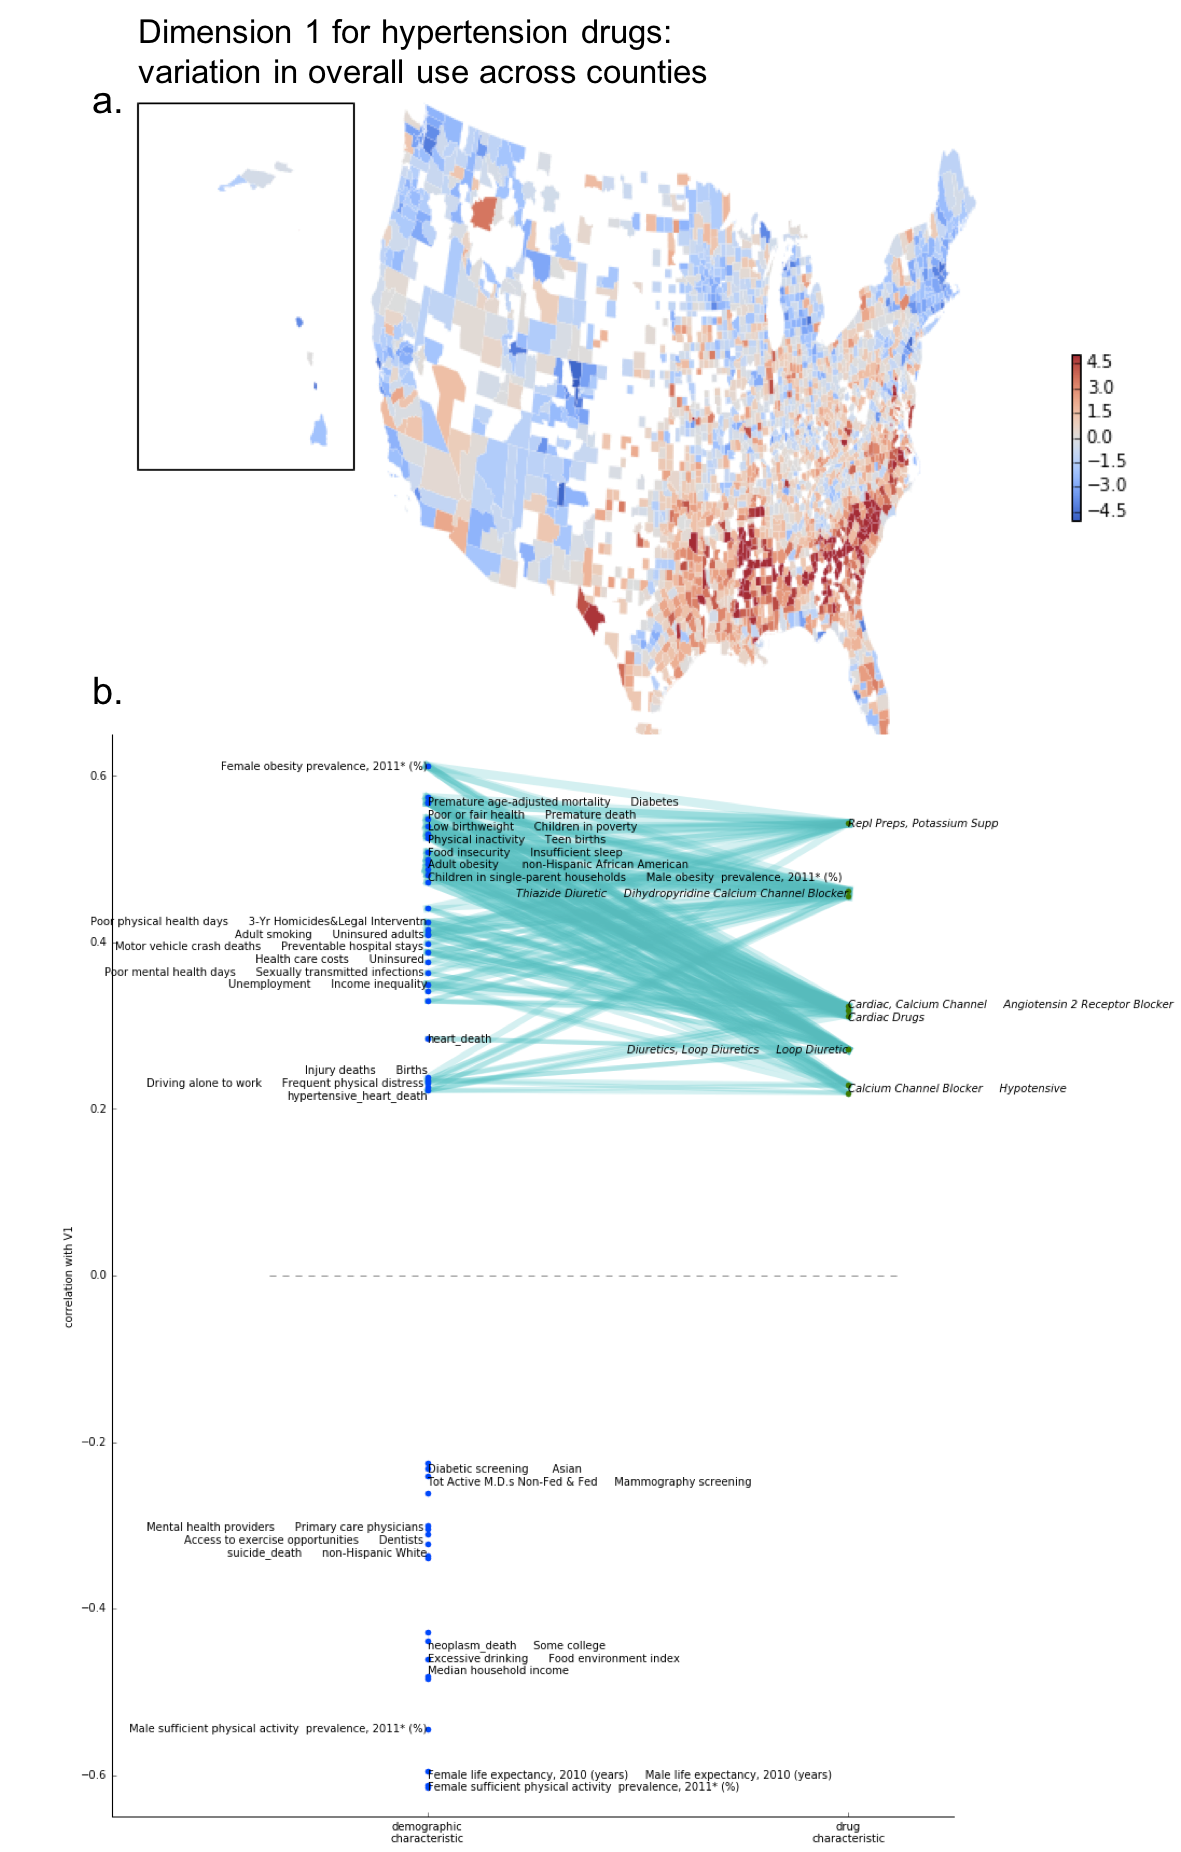

In [6]:
# Figure 2
Image(filename='png/V1_map_cor.png',width=800)

More interesting is the second dimension V2 which is of course orthogonal to V1. This dimension captures geographically diverse more urban populations (metro DC, new york, louisiana, Figure 3a), especially with non-white populations. Very interestingly, Figure 3b shows this corresponds to both diffferences in the types of drugs used (thiazides more in the white/rural and angiotensin 2 receptor blockers more in the minority/urban), **and** in the price of drugs used (fraction of drug that is a brand, and cost (from medicaid NADAC), and drug release date): 

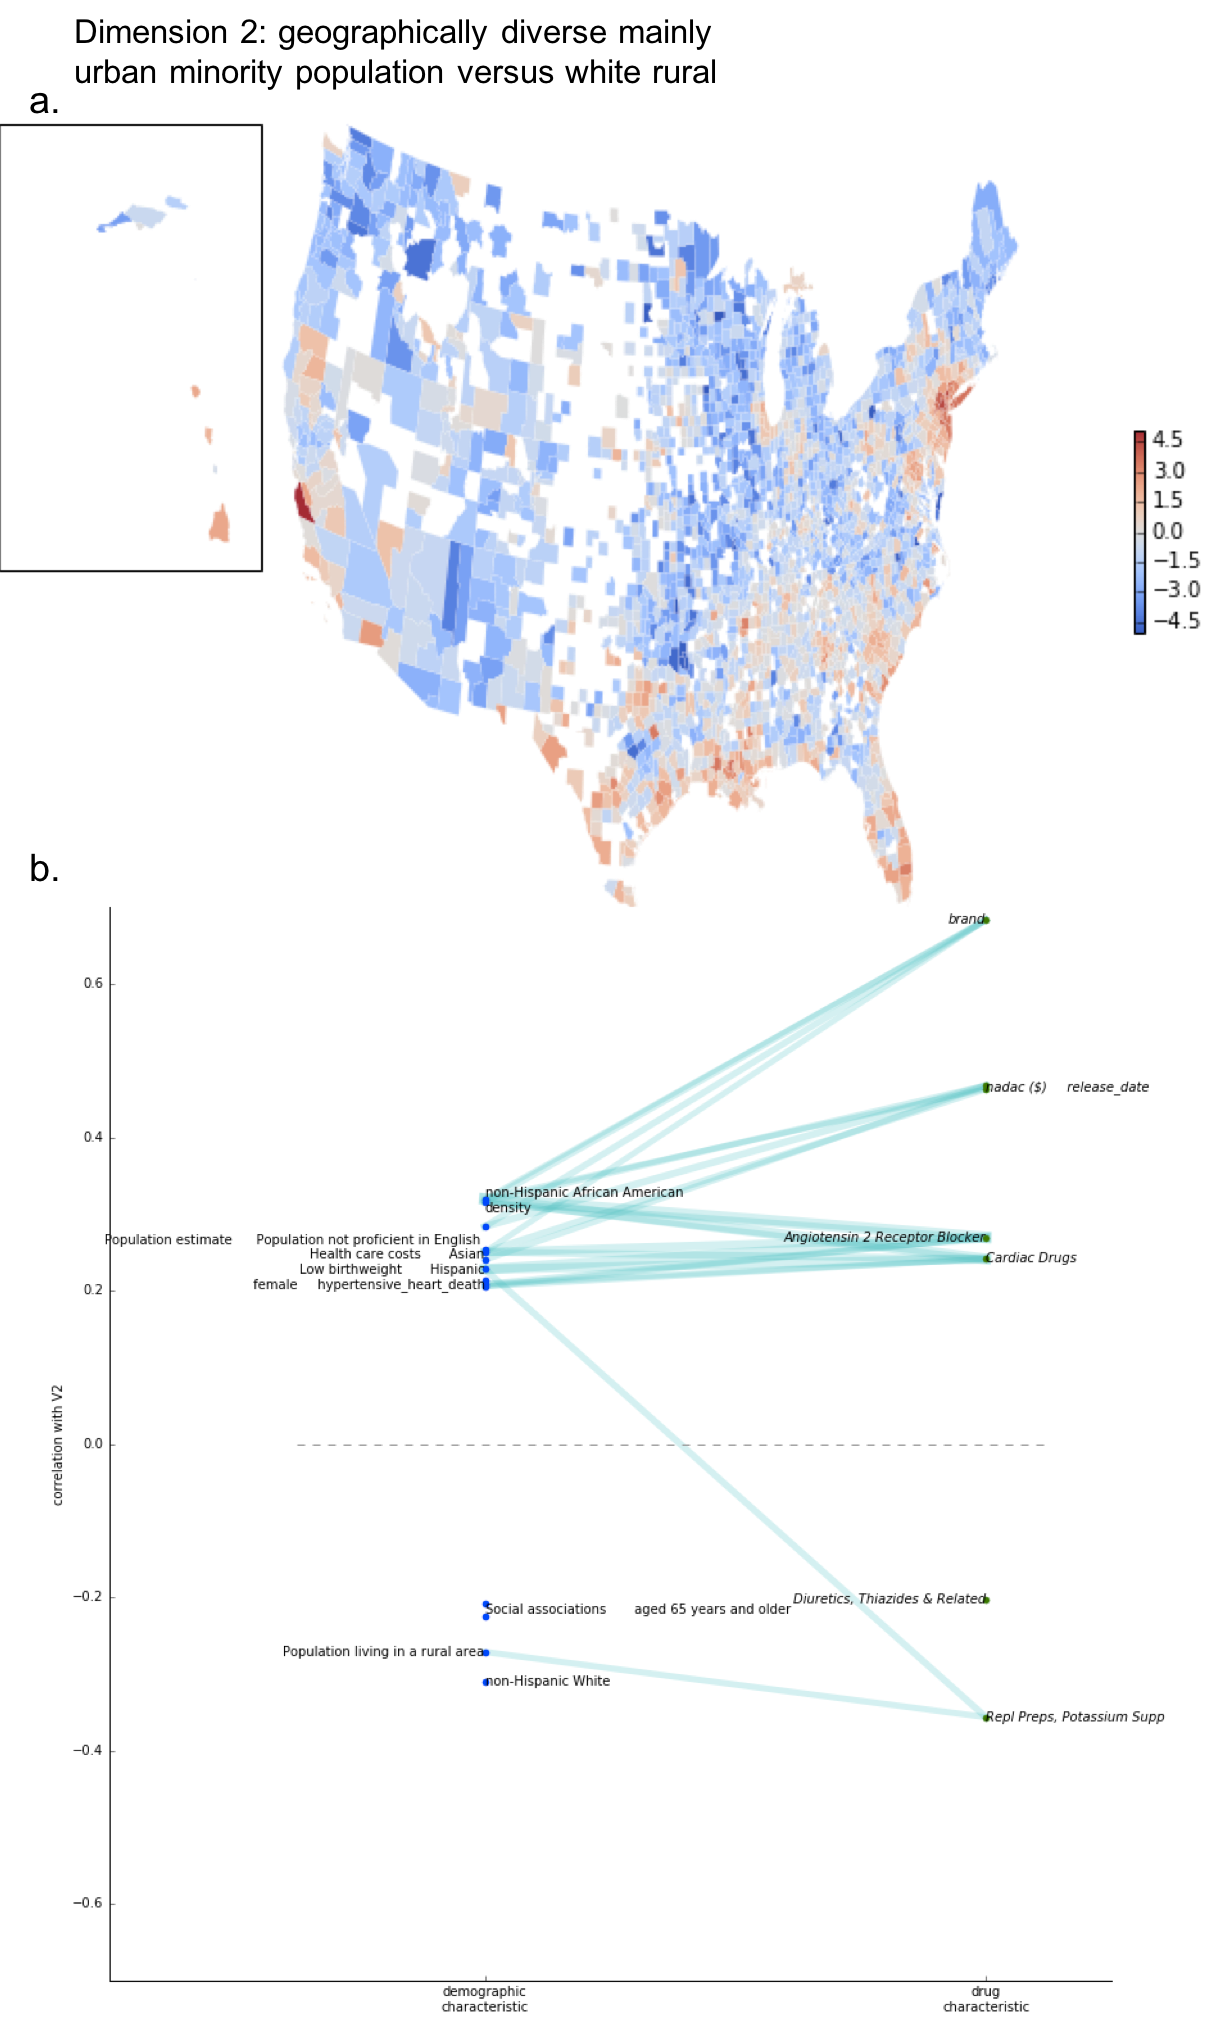

In [10]:
# Figure 3
Image(filename='png/V2_map_cor.png',width=700)

So I focused on the second dimension.  Below, Figure 4, for each drug, I plot how the drug is positively/negatively associated with V2 (x-axis) versus the price-indicators of the drug (y-axis), there is a clear correlation.  I also colored the drugs by therapeutic class (top two plots) and by established pharmacological class (bottom two plots).  Angiotensin 2 receptor blockers are the most expensive and most brand-name, while various diuretics tend to be cheaper and generic.

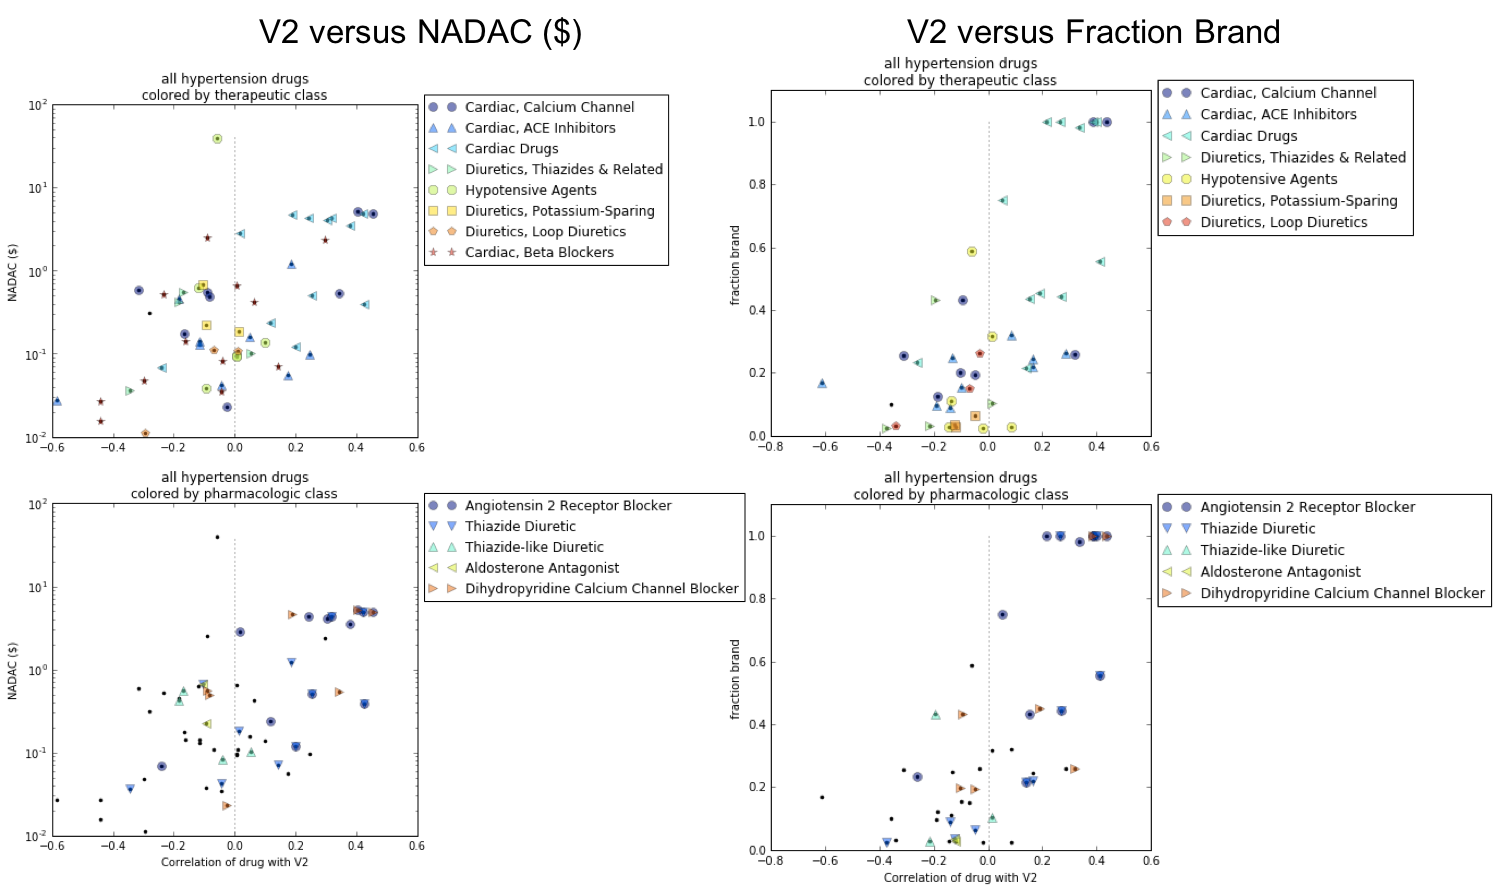

In [37]:
# Figure 4
Image(filename='png/v2_vs_pricing.png',width=900)

In order to assess how much of this is due to difference in drug classes versus drugs in each class, I then compared individual drugs in the classes: 
- angiotensin 2 receptor blockers: more expensive drugs that are also less recommended, and are positively associated with V2 
- diuretics: including thiazide and non-thiazide as well as potassium chloride supplements, and negatively associated with V2
- ACE inhibitors, which do not show a clear association on average with V2

Below, use of different diuretics across counties, where counties are ranked by their projection in V2 (x-axis).  The y-axis shows each county's positive or negative deviation of each diuretic drug from the model (smoothed). The counties at the left end have more diuretics overall, but in particular more of the generic diuretics (black/purple lines).  

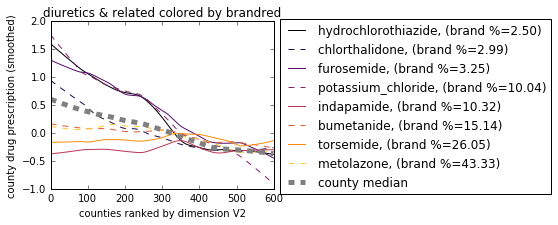

In [25]:
Image(filename='png/diuretic_brand.png',width=600)

The opposite trend is apparent with the Angiotensin 2 receptor blockers. Again, the low-V2 counties have lowest use of the expensive brand-name drugs.  An exception is losartan potassium, a popular drug with many generics:

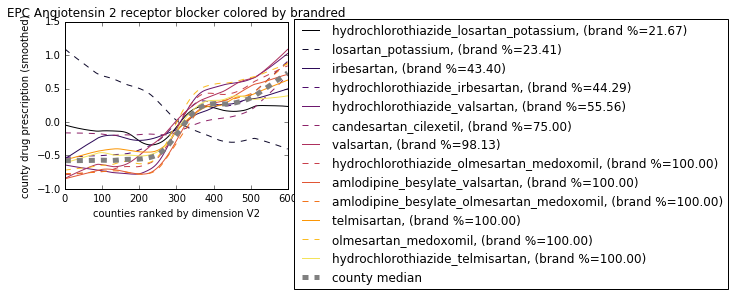

In [26]:
Image(filename='png/angiotensin2blocker_brand.png',width=750)

Even when use of drugs in the class on average does not vary across the counties, as with the ACE inhibitors, there is still a trend where the white/rural counties use the cheaper drugs and the urban/minority counties have more expensive drugs:

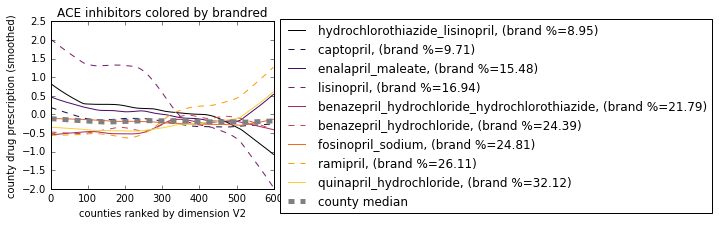

In [27]:
Image(filename='png/ACE_brand.png',width=750)

These are some of the most widely used drugs in the USA, and they are typically used for many years, so the cost implications could be big.  The results suggest that the urban/minority county patients are less likely to receive diuretics, a cheaper and more recommended drug as compared to angiotensin 2 inhibitors. These counties also have higher healthcare costs.  

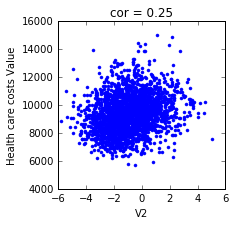

In [36]:
Image(filename='png/health_care_costs.png',width=200)

Caveats: if drugs are prescribed for multiple purposes, and there is variation in presence of diseases besides hypertension, this could be responsible for trends.  I tried to keep only drugs that were prescribed for hypertension, removing ie vasodilators which technically lower blood pressure but are not usually prescribed for hypertension. Besides this, focusing on drugs within one class should address this problem.